In [11]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
from acse_9_irp_wafflescore import MiscHelpers as mh
from acse_9_irp_wafflescore import SOMsHelpers as sh
from acse_9_irp_wafflescore import FCMHelpers as fh
from acse_9_irp_wafflescore import dataPreprocessing as dp

import numpy as np
from timeit import default_timer as timer

import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

# Tested with model with smaller anomaly (M5b)

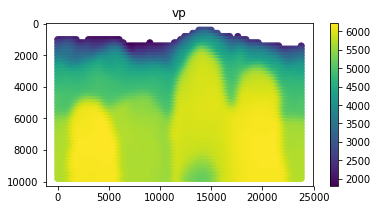

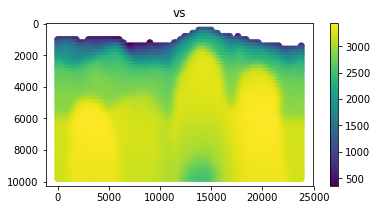

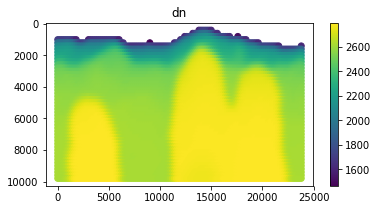

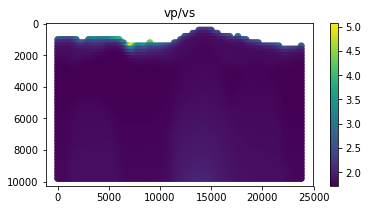

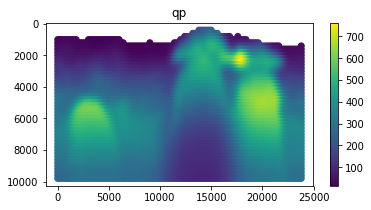

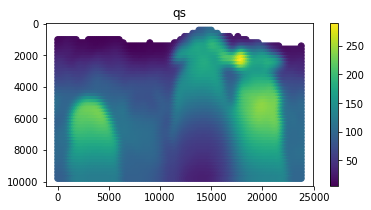

In [5]:
model = 'M5b'

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(cdir)

means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)

col_n = ['vp', 'vs', 'dn', 'vp/vs', 'qp', 'qs', 'x', 'z']
mh.plot_fields(idata[:,:-2], x, z, titles=col_n[:-2])

In [6]:
means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)

In [ ]:
g_res = (34, 4000, 0.5, 2)
cluster_labels, avg_sils, avg_ch, dim, it, lr, sig = sh.random_search_som(norm_data, g_res)

### Result from random search

| Dimension | Iteration | Learning Rate | Sigma    | Silhouette Score | Calinski Harabaz  |
|-----------|-----------|---------------|----------|------------------|-------------------|
| 42        | 3500      | 0.455185      | 2.034483 | 0.099022         | 1025.587367       |
| 42        | 3500      | 0.333614      | 1.965517 | 0.052766         | 1133.190408       |
| 39        | 3900      | 0.627987      | 2.724138 | 0.012874         | 849.064418        |
| 34        | 3500      | 0.352648      | 2.586207 | 0.101516         | 1166.716261       |
| 28        | 4300      | 0.411920      | 1.827586 | 0.183970         | 735.002153        |
| 37        | 3900      | 0.649246      | 1.551724 | 0.063963         | 773.470431        |
| 38        | 3700      | 0.656490      | 1.620690 | 0.008489         | 939.783383        |
| 41        | 4100      | 0.460264      | 2.034483 | 0.352136         | 930.653439        |
| 26        | 4300      | 0.394036      | 2.862069 | 0.085335         | 1247.999601       |
| 40        | 3700      | 0.341101      | 1.896552 | 0.111925         | 1363.543003       |
| 41        | 3500      | 0.308680      | 1.827586 | 0.120439         | 1032.707676       |
| 38        | 3700      | 0.656490      | 1.551724 | 0.065325         | 862.401445        |
| 28        | 4300      | 0.520021      | 1.344828 | 0.114659         | 820.655592        |
| 42        | 3700      | 0.430617      | 3.000000 | 0.188410         | 1320.232533       |
| 32        | 4300      | 0.491953      | 2.310345 | 0.083481         | 870.997504        |
| 38        | 4100      | 0.301905      | 1.896552 | 0.085886         | 869.885199        |
| 39        | 3700      | 0.475845      | 2.862069 | -0.034931        | 1001.385126       |
| 31        | 3900      | 0.600721      | 1.068966 | -0.039465        | 884.298641        |
| 33        | 3700      | 0.642081      | 2.034483 | 0.046745         | 1052.423670       |
| 40        | 4100      | 0.470594      | 2.448276 | 0.150802         | 1223.052308       |

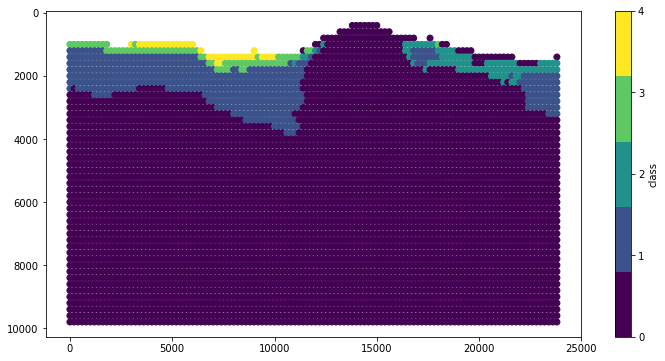

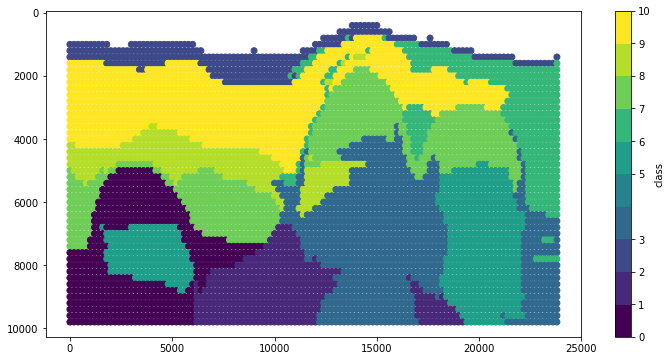

In [26]:
# first plot: (41, 4100, 0.460264, 2.034483)
# second plot: (40, 3700, 0.341101, 1.896552)
for c in cluster_labels:
    mh.plot_e_model(c, x, z, sep_label=True)


From observing the two final result, seems like dim, iter_cnt, lr, sigma = (40, 3700, 0.341101, 1.896552) is the best hyperparameter for model5b

In [ ]:
dim, iter_cnt, lr, sigma = (40, 3700, 0.341101, 1.896552)
som, cluster_labels = sh.run_SOMs(norm_data, dim, iter_cnt, lr, sigma)
n_map = som.neuron_map(norm_data)

u_matrix = som.distance_map().T
watershed_bins = sh.histedges_equalN(u_matrix.flatten())
ws_labels = sh.watershed_level(u_matrix, watershed_bins, plot=False)
n_map = som.neuron_map(norm_data)
cluster_labels, sils, csc, best_idx = sh.eval_ws(norm_data, ws_labels, n_map, re_all=True)

(dim: 30 ,iter: 4000 ,lr 0.512439 ,sigma: 2.189655 )
sil: 0.06737399867973155 ,ch: 797.5421114601577


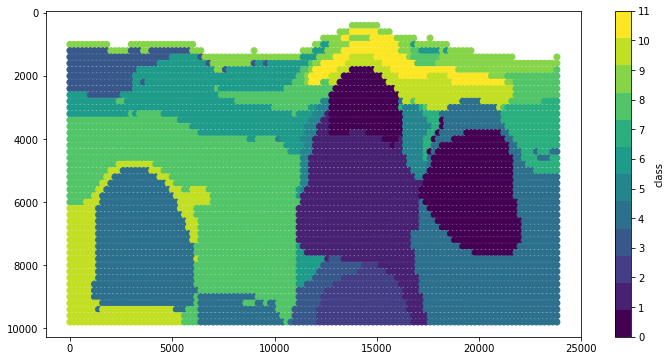

In [36]:
# plot of best silhouette score
i = 27
print('(dim:', dim, ',iter:', iter_cnt, ',lr', lr, ',sigma:', sigma, ')')
print('sil:', sils[i], ',ch:', csc[i])
mh.plot_e_model(cluster_labels[i], x, z, sep_label=True)